<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Clustering/blob/master/(_CLUSTERING_)_KMeans_Agrupamento_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1o. Problema do Negócio**

Criar uma máquina preditiva que utilize informações de consumo de energia elétrica, agrupando os consumidores por similaridade com o objetivo de entender o comportamento destes clientes e sua relação com o consumo de energia.

**Dataset UCI**:
https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#

#**2o. Análise Exploratória dos Dados**

**Fontes de Dados**

Medições contendo o consumo de energia elétrica por cliente com uma taxa de amostragem por minuto em um período de quase 4 anos.

**AD ( Arquitetura de Dados )**:
1.   **data**: Data no formato dd/mm/aa
2.   **hora**: Hora no formato hh:mm:ss
3.   **Global_active_power**: Potência ativa média
4.   **Global_reactive_power**: Potência reativa média
5.   **Voltage**: Tensão média por minuto (volts)
6.   **Global_intensity**: Intensidade de corrente média.
7.   **Sub_metering_1**: Cozinha
8.   **Sub_metering_2**: Lavanderia
9.   **Sub_metering_3**: Aquecedor elétrico de água e ar condicionado









In [1]:
# Librarys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pylab

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# Métrica para avaliar algoritmos de clusterização
from sklearn.metrics import silhouette_score 

from scipy.spatial.distance import cdist, pdist

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# Carga dos Dados
dados  = pd.read_csv( 'household_power_consumption.txt', delimiter=';', low_memory=False)

In [4]:
# Visualizar as 5 primeiras linhas
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
# Dimensões do dataset ( linhas e colunas )
dados.shape

(1469150, 9)

In [6]:
# Tipos dos campos do dataset
dados.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [7]:
# Informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469150 entries, 0 to 1469149
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1469150 non-null  object 
 1   Time                   1469150 non-null  object 
 2   Global_active_power    1469149 non-null  object 
 3   Global_reactive_power  1469149 non-null  object 
 4   Voltage                1469149 non-null  object 
 5   Global_intensity       1469149 non-null  object 
 6   Sub_metering_1         1469149 non-null  object 
 7   Sub_metering_2         1469149 non-null  object 
 8   Sub_metering_3         1460803 non-null  float64
dtypes: float64(1), object(8)
memory usage: 100.9+ MB


In [8]:
# Verificando existência de valores Nulos
if ( dados.isnull().values.any() == False ):
  print( "Não existem dados nulos no dataset !" )
else:
  print( dados.isnull().sum() )


Date                        0
Time                        0
Global_active_power         1
Global_reactive_power       1
Voltage                     1
Global_intensity            1
Sub_metering_1              1
Sub_metering_2              1
Sub_metering_3           8347
dtype: int64


## **3o. Pré-processamento dos Dados**

In [9]:
# Seleção dos atributos e eliminação de valores nulos
dataset = dados.iloc[ 0: , 2:9 ].dropna()

In [10]:
# Novo dataset sem as colunas Data e Hora, e sem valores nulos
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
1469144,1.358,0.102,242.650,5.600,0.000,0.000,19.0
1469145,0.450,0.112,243.570,2.400,0.000,0.000,4.0
1469146,0.276,0.116,243.860,1.200,0.000,0.000,1.0
1469147,0.218,0.000,243.940,0.800,0.000,0.000,1.0


In [11]:
# Obtem o valor de cada variável em um formato de ARRAY
# Criando o X ( Features )
X = dataset.values

In [12]:
# Imprimindo o array
X

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.276', '0.116', '243.860', ..., '0.000', '0.000', 1.0],
       ['0.218', '0.000', '243.940', ..., '0.000', '0.000', 1.0],
       ['0.214', '0.000', '243.820', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [13]:
# Coletar uma pequena amostra do dataset ( 1% ) para não comprometer o processamento, o dataset é muito grande ( 2Gb )
dataset, amostra_02 = train_test_split( X, train_size = 0.01 )

In [14]:
# train_teste_split
print( 'Amostras Treinamento (dataset):', dataset.shape)
print( 'Amostras Teste (amostra_02)   :', amostra_02.shape)


Amostras Treinamento (dataset): (14608, 7)
Amostras Teste (amostra_02)   : (1446195, 7)


# **4o. Máquina Preditiva Segmentação de Clientes**

**PCA** - Redução de Dimensionalidade por Componentes Principais

Iremos reduzir a dimensaionalidade dos dados utilizando PCA.

In [15]:
# Redução da dimensionalidade no array das variáveis
pca = PCA( n_components = 2 ).fit_transform( dataset )

In [16]:
# Determinando um range de parâmetros para o KMeans
k_range = range( 1, 12 )
k_range

range(1, 12)

In [17]:
# Aplicando o modelo KMeans para cada valor de k_ramge
k_means_var = [ KMeans ( n_clusters = k ).fit( pca ) for k in k_range ]

**Curva de Elbow**

Text(0.5, 1.0, 'Variância explicada para cada valor de k')

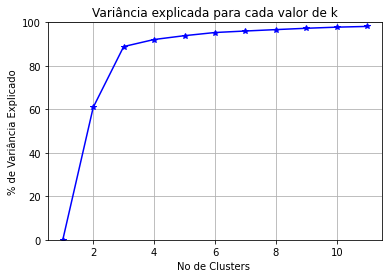

In [18]:
# Ajustando o centróide do cluester para cada modelo
centroids = [ X.cluster_centers_ for X in k_means_var ]

# Calculando a distância euclidiana de cada ponto de dados para o centróide
k_euclid = [ cdist( pca, cent, 'euclidean' ) for cent in centroids ]
dist = [ np.min( ke, axis = 1 ) for ke in k_euclid ]

# Soma dos quadrados das distâncias dentro do cluester
soma_quadrados_intra_cluster = [ sum( d** 2) for d in dist ]

# Soma total dos quadrados
soma_total = sum( pdist(pca) ** 2 ) / pca.shape[0]

# Soma dos quadrados entre clusters
soma_quadrados_intra_cluster = soma_total - soma_quadrados_intra_cluster

# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot( 111 )
ax.plot( k_range, soma_quadrados_intra_cluster / soma_total * 100, 'b*-' )
ax.set_ylim( 0,100 )
plt.grid( True )
plt.xlabel( 'No de Clusters ')
plt.ylabel( "% de Variância Explicado" )
plt.title( 'Variância explicada para cada valor de k' )

# **Escolhendo um valor de k igual a ( 8 ) para avaliação da máquina preditiva**

In [19]:
# Criando um modelo com k = 8
modelo_v1 = KMeans( n_clusters=8 )
modelo_v1.fit( pca )


KMeans()

# **5o. Avaliação da Máquina Preditiva**

**Avaliando a Máquina Preditiva com k=8**

In [20]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[ :, 0 ].min() - 5, pca[ :, 0 ].max() - 1
y_min, y_max = pca[ :, 1 ].min() + 1, pca[ :, 1 ].max() + 5

xx, yy = np.meshgrid( np.arange( x_min, x_max, .02 ), np.arange( y_min, y_max, .02 ) )

Z = modelo_v1.predict( np.c_[ xx.ravel(), yy.ravel() ] )
Z = Z.reshape( xx.shape )

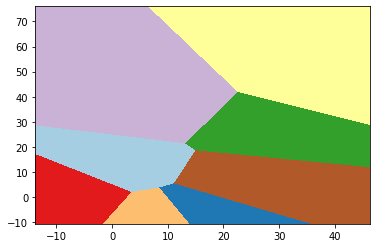

In [21]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()

plt.imshow( Z,
            interpolation = 'nearest',
            extent = ( xx.min(), xx.max(), yy.min(), yy.max() ),
            cmap = plt.cm.Paired,
            aspect = 'auto', 
            origin = 'lower')

In [22]:
# Silhutte Score

melhor_se = 0
melhor_k  = 0

for k in range( 8, 13 ):
  modelo_v1 = KMeans( n_clusters=k )
  modelo_v1.fit( pca )

  labels = modelo_v1.labels_
  se = silhouette_score( pca, labels, metric = 'euclidean' )

  print( '\nsilhouette_score: {0} para k = {1}'.format( se, k ))

  if ( se > melhor_se ):
    melhor_se = se
    melhor_k  = k

print( '\nMelhor silhouette_score: {0} para k = {1}'.format( melhor_se, melhor_k ))


silhouette_score: 0.7773050918109364 para k = 8

silhouette_score: 0.6383792437780146 para k = 9

silhouette_score: 0.6524441385205888 para k = 10

silhouette_score: 0.6514575704024744 para k = 11

silhouette_score: 0.5158896953537767 para k = 12

Melhor silhouette_score: 0.7773050918109364 para k = 8


# Usando a Marcação dos Cluesters na Máquna Preditiva

array([['1.524', '0.298', '242.090', ..., '0.000', '1.000', 1.0],
       ['0.974', '0.140', '240.640', ..., '0.000', '0.000', 0.0],
       ['1.268', '0.090', '240.410', ..., '0.000', '0.000', 18.0],
       ...,
       ['0.302', '0.076', '243.660', ..., '0.000', '1.000', 0.0],
       ['0.246', '0.100', '240.890', ..., '0.000', '2.000', 1.0],
       ['1.654', '0.068', '237.880', ..., '0.000', '0.000', 18.0]],
      dtype=object)

In [31]:
# Melhor k = 8
modelo_kmeans = KMeans( n_clusters = 8 )
modelo_kmeans.fit( pca )

# Lista com nomes das colunas
campos = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Incluindo no número do cluster na base original de clientes
dados_cluster = pd.DataFrame( dataset, columns = campos )
dados_cluster[ 'Global_active_power' ]   = pd.to_numeric( dados_cluster[ 'Global_active_power' ] )
dados_cluster[ 'Global_reactive_power' ] = pd.to_numeric( dados_cluster[ 'Global_reactive_power' ] )
dados_cluster[ 'Voltage' ]               = pd.to_numeric( dados_cluster[ 'Voltage' ] )
dados_cluster[ 'Global_intensity' ]      = pd.to_numeric( dados_cluster[ 'Global_intensity' ] )
dados_cluster[ 'Sub_metering_1' ]        = pd.to_numeric( dados_cluster[ 'Sub_metering_1' ] )
dados_cluster[ 'Sub_metering_2' ]        = pd.to_numeric( dados_cluster[ 'Sub_metering_2' ] )
dados_cluster[ 'Sub_metering_3' ]        = pd.to_numeric( dados_cluster[ 'Sub_metering_3' ] )
dados_cluster[ 'cluster' ] = modelo_kmeans.labels_

In [32]:
dados_cluster

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,0.226,0.152,239.97,1.2,0.0,1.0,0.0,0
1,0.322,0.218,242.06,1.6,0.0,0.0,1.0,0
2,1.730,0.268,241.04,7.2,0.0,1.0,18.0,1
3,0.290,0.062,241.31,1.4,0.0,0.0,0.0,0
4,3.814,0.324,235.06,17.0,19.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...
14603,0.308,0.090,240.04,1.4,0.0,2.0,0.0,0
14604,1.098,0.358,239.32,5.6,0.0,2.0,9.0,1
14605,0.304,0.000,237.88,1.2,0.0,0.0,0.0,0
14606,0.216,0.000,241.87,1.0,0.0,0.0,0.0,0


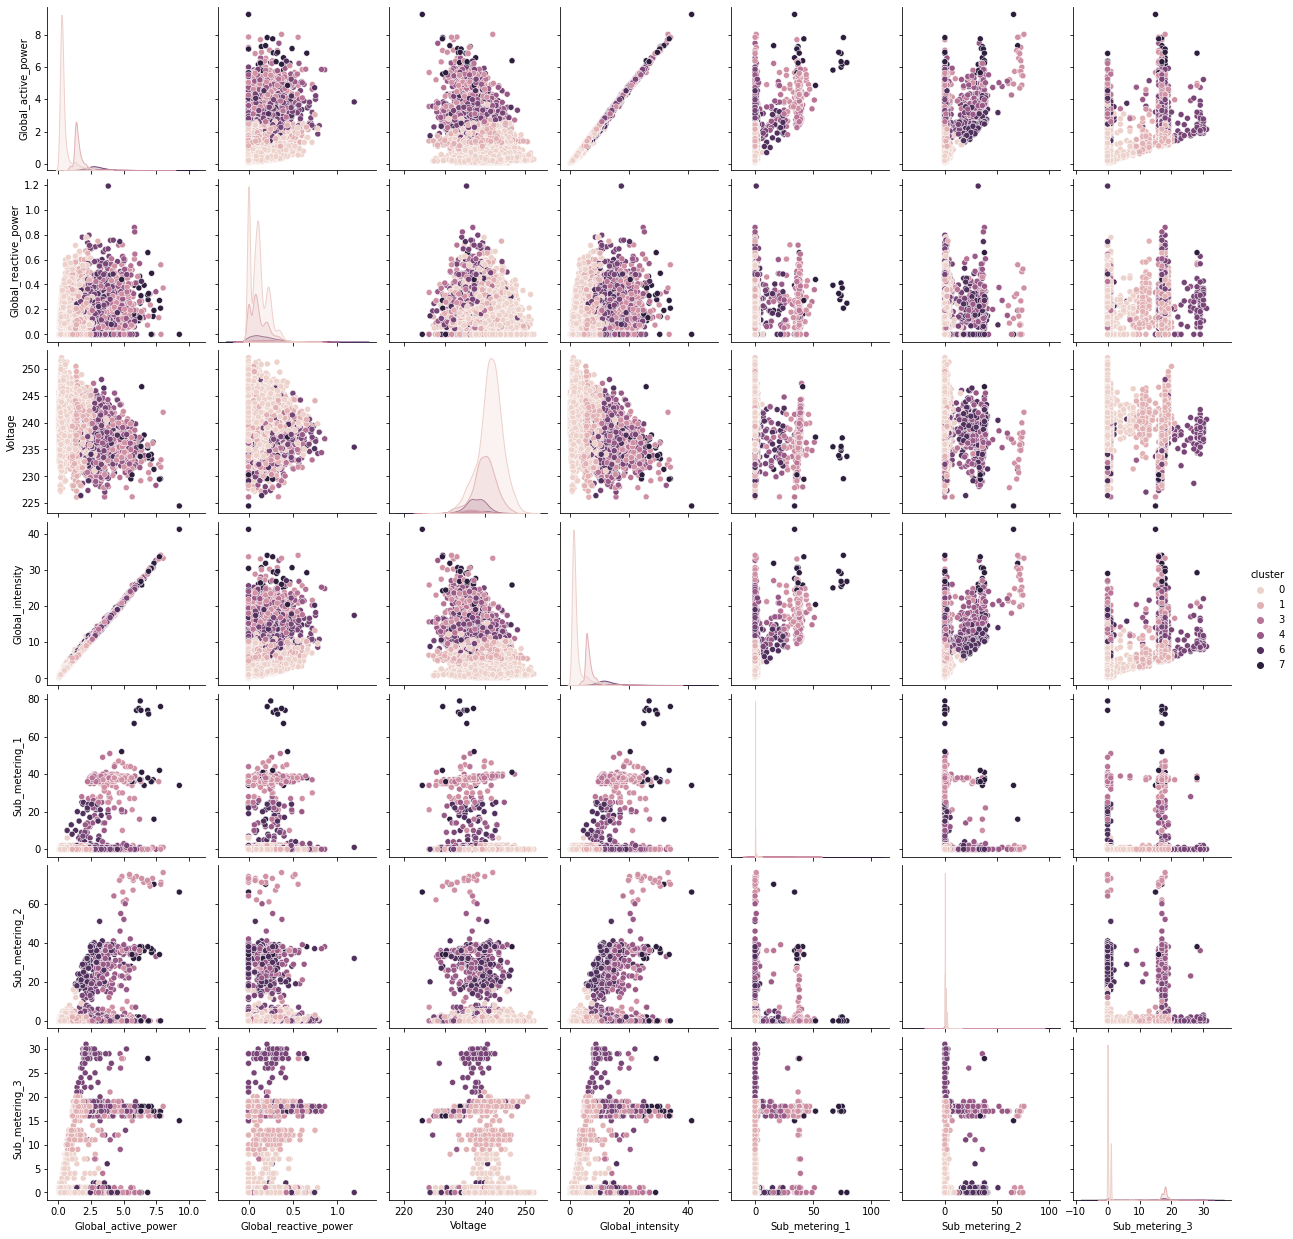

In [33]:
sns.pairplot( dados_cluster, hue = 'cluster' )
plt.show()

In [77]:
# Calcular a média de energia por cluster
dados_cluster.groupby('cluster')['Global_active_power'].mean()

cluster
0    0.513457
1    1.807133
2    4.625548
3    3.838344
4    3.384631
5    1.103090
6    2.317964
7    2.578937
Name: Global_active_power, dtype: float64

In [ ]:
fig, plt.scatter( )